### Importación de datos



In [16]:
import pandas as pd
from matplotlib import pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [6]:
tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [9]:
ingresos_totales_tienda1=sum(tienda['Precio'])
ingresos_totales_tienda2=sum(tienda2['Precio'])
ingresos_totales_tienda3=sum(tienda3['Precio'])
ingresos_totales_tienda4=sum(tienda4['Precio'])
print(f"Ingresos totales:\n Tienda 1: {ingresos_totales_tienda1}\n Tienda 2: {ingresos_totales_tienda2}\n Tienda 3: {ingresos_totales_tienda3}\n Tienda 4: {ingresos_totales_tienda4}")

Ingresos totales:
 Tienda 1: 1150880400.0
 Tienda 2: 1116343500.0
 Tienda 3: 1098019600.0
 Tienda 4: 1038375700.0


In [14]:
informacion_tiendas = {
    "Tiendas": ["1", "2", "3", "4"],
    "Ingresos totales": [ingresos_totales_tienda1, ingresos_totales_tienda2, ingresos_totales_tienda3, ingresos_totales_tienda4]
}

tabla_informacion_tiendas = pd.DataFrame(informacion_tiendas)
tabla_informacion_tiendas.head()

,Tiendas,Ingresos totales
0,1,1.150880e+09
1,2,1.116344e+09
2,3,1.098020e+09
3,4,1.038376e+09


In [15]:
tabla_informacion_tiendas.sort_values(by="Ingresos totales")

,Tiendas,Ingresos totales
3,4,1.038376e+09
2,3,1.098020e+09
1,2,1.116344e+09
0,1,1.150880e+09


<function matplotlib.pyplot.show(close=None, block=None)>

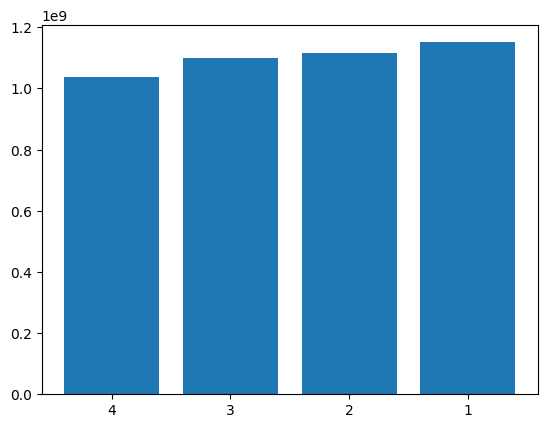

In [18]:
plt.bar(x=tabla_informacion_tiendas.sort_values(by="Ingresos totales")['Tiendas'], height=tabla_informacion_tiendas.sort_values(by="Ingresos totales")['Ingresos totales'])
plt.show

# 2. Ventas por categoría

# 3. Calificación promedio de la tienda


# 4. Productos más y menos vendidos

# 5. Envío promedio por tienda